In [18]:
import torch
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
from pathlib import Path
import os
from sklearn import preprocessing
from torch.utils.data import TensorDataset, DataLoader, Dataset
import torch.optim as optim
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt

import cv2

In [2]:
DEVICE = torch.device("cuda")
DEVICE

device(type='cuda')

In [12]:
transforms_train = transforms.Compose([
    transforms.ToPILImage(),
    transforms.RandomRotation(90),
#     transforms.CenterCrop(10),
    transforms.RandomHorizontalFlip(),
    transforms.RandomVerticalFlip(),
    transforms.ColorJitter(),
#     ImageNetPolicy(),
    
    transforms.ToTensor(),
    transforms.Normalize( mean = np.array([0.485, 0.456, 0.406]),
    std = np.array([0.229, 0.224, 0.225]))
])
train_transforms = transforms.Compose([transforms.ToPILImage(),
                                        transforms.RandomRotation(30),
                                       transforms.RandomResizedCrop(224),
                                       transforms.RandomHorizontalFlip(),
                                       transforms.ToTensor(),
                                       transforms.Normalize([0.485, 0.456, 0.406],
                                                            [0.229, 0.224, 0.225])])
train_dataset = FoodData(train_data,input_root_dir,256,transforms_train)

NameError: name 'FoodData' is not defined

In [3]:
data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

In [4]:

# data_dir = ''
# image_datasets = {x: datasets.ImageFolder(f'{data_dir}/{x}', data_transforms[x]) for x in ['train', 'val']}
# dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=32, shuffle=True, num_workers=4) for x in ['train', 'val']}


input_root_dir = "/Users/shjoo/food_data/food-101/food-101"
input_root_path = Path(input_root_dir)
print(os.listdir(input_root_dir))
image_dir_path = input_root_path/'images'

class_path = input_root_dir+'/meta/classes.txt'
train_img_name_path = input_root_dir+'/meta/train.txt'
test_img_name_path = input_root_dir+'/meta/test.txt'




['.DS_Store', 'images', 'license_agreement.txt', 'meta', 'README.txt']


In [5]:
def file2list(path):
    file1 = open(path,'r')
    lines = file1.readlines()
    final_list = [line.strip() for line in lines]
    return final_list

classes = file2list(class_path)
train_data = file2list(train_img_name_path)
test_data = file2list(test_img_name_path)
le = preprocessing.LabelEncoder()
targets = le.fit_transform(classes)

In [13]:
class FoodData(Dataset):
    def __init__(self,img_path,img_dir,size,transform=None):
        self.img_path = img_path
        self.img_dir = img_dir
        self.transform = transform
        self.size = size
#         self.mode = mode
        
    def __len__(self):
        return len(self.img_path)
    
    def __getitem__(self,index):
        label,img_name = self.img_path[index].split('/')
        path = self.img_dir+'/images/'+label+'/'+img_name+'.jpg'
        img = cv2.imread(path)
        img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
        img = cv2.resize(img,(self.size,self.size))
        if self.transform:
            img = self.transform(img)
        return {
                'gt': img,
                'label': torch.tensor(le.transform([label])[0])
            }

In [14]:
class Cutout(object):
    """Randomly mask out one or more patches from an image.
    Args:
        n_holes (int): Number of patches to cut out of each image.
        length (int): The length (in pixels) of each square patch.
    """
    def __init__(self, n_holes, length):
        self.n_holes = n_holes
        self.length = length

    def __call__(self, img):
        """
        Args:
            img (Tensor): Tensor image of size (C, H, W).
        Returns:
            Tensor: Image with n_holes of dimension length x length cut out of it.
        """
        h = img.size(1)
        w = img.size(2)

        mask = np.ones((h, w), np.float32)

        for n in range(self.n_holes):
            y = np.random.randint(h)
            x = np.random.randint(w)

            y1 = np.clip(y - self.length // 2, 0, h)
            y2 = np.clip(y + self.length // 2, 0, h)
            x1 = np.clip(x - self.length // 2, 0, w)
            x2 = np.clip(x + self.length // 2, 0, w)

            mask[y1: y2, x1: x2] = 0.

        mask = torch.from_numpy(mask)
        mask = mask.expand_as(img)
        img = img * mask

        return img

In [15]:
transforms_train = transforms.Compose([
    transforms.ToPILImage(),
    transforms.RandomRotation(90),
#     transforms.CenterCrop(10),
    transforms.RandomHorizontalFlip(),
    transforms.RandomVerticalFlip(),
    transforms.ColorJitter(),
#     ImageNetPolicy(),
    
    transforms.ToTensor(),
    transforms.Normalize( mean = np.array([0.485, 0.456, 0.406]),
    std = np.array([0.229, 0.224, 0.225]))
])

train_dataset = FoodData(train_data,input_root_dir,256,transforms_train)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([3, 256, 256])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


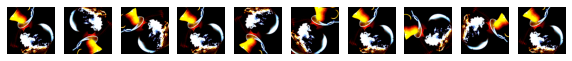

In [19]:
train_dataset.img_path
train_dataset.img_dir , train_dataset.img_path

#image_datasets = {x : datasets.Image}

print(train_dataset.__getitem__(3)['gt'].size())

pltsize = 1
plt.figure(figsize= (10 * pltsize, pltsize))

for i in range(10) :
    plt.subplot(1, 10, i + 1)
    plt.axis("off")
    plt.imshow(np.transpose(train_dataset.__getitem__(3)['gt'], (1,2,0)))

In [9]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


device(type='cpu')

In [20]:
from torch.utils.data.sampler import SubsetRandomSampler

batch = 64
valid_size = 0.2
num = train_data.__len__()
# Dividing the indices for train and cross validation
indices = list(range(num))
np.random.shuffle(indices)
split = int(np.floor(valid_size*num))
train_idx,valid_idx = indices[split:], indices[:split]

#Create Samplers
train_sampler = SubsetRandomSampler(train_idx)
valid_sampler = SubsetRandomSampler(valid_idx)

train_loader = DataLoader(train_dataset, batch_size = batch, sampler = train_sampler)
valid_loader = DataLoader(train_dataset, batch_size = batch, sampler = valid_sampler)

In [21]:
dataloaders = {}
dataset_sizes = {}
dataloaders['train'] = train_loader
dataloaders['val'] = valid_loader
dataset_sizes['train'] = train_sampler.__len__()
dataset_sizes['val'] = valid_sampler.__len__()

In [22]:
def train(model, train_loader, optimizer, log_interval):
    model.train()
    for batch_idx, item in enumerate(train_loader) :
        image = item['gt'].to(DEVICE)
        label = item['label'].to(DEVICE)
        optimizer.zero_grad()
        image = image.to(torch.float32)
        output = model(image)
        loss = criterion(output, label)
        loss.backward()
        optimizer.step()

        if batch_idx % log_interval == 0:
            print("Train Epoch: {} [{}/{} ({:.0f}%)]\tTrain Loss: {:.6f}".format(
                epoch, batch_idx * len(image), 
                len(train_loader.dataset), 100. * batch_idx / len(train_loader), 
                loss.item()))

In [23]:
def evaluate(model, test_loader):
    model.eval()
    test_loss = 0
    correct = 0

    with torch.no_grad():
         for batch_idx, item in enumerate(train_loader) :
            image = item['gt'].to(DEVICE)
            label = item['label'].to(DEVICE)
            image = image.to(torch.float32)
            output = model(image)
            test_loss += criterion(output, label).item()
            prediction = output.max(1, keepdim = True)[1]
            correct += prediction.eq(label.view_as(prediction)).sum().item()
    
    test_loss /= (len(test_loader.dataset) / BATCH_SIZE)
    test_accuracy = 100. * correct / len(test_loader.dataset)
    
    return test_loss, test_accuracy

In [24]:
# Define the DenseNet model
model = models.densenet121(pretrained=True)
num_ftrs = model.classifier.in_features
model.classifier = nn.Linear(num_ftrs, 101)
model


C:\Users\shjoo\anaconda3\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
C:\Users\shjoo\anaconda3\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=DenseNet121_Weights.IMAGENET1K_V1`. You can also use `weights=DenseNet121_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


DenseNet(
  (features): Sequential(
    (conv0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (norm0): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu0): ReLU(inplace=True)
    (pool0): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (denseblock1): _DenseBlock(
      (denselayer1): _DenseLayer(
        (norm1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu1): ReLU(inplace=True)
        (conv1): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (norm2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu2): ReLU(inplace=True)
        (conv2): Conv2d(128, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      )
      (denselayer2): _DenseLayer(
        (norm1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu

In [27]:
# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
print(model)

DenseNet(
  (features): Sequential(
    (conv0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (norm0): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu0): ReLU(inplace=True)
    (pool0): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (denseblock1): _DenseBlock(
      (denselayer1): _DenseLayer(
        (norm1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu1): ReLU(inplace=True)
        (conv1): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (norm2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu2): ReLU(inplace=True)
        (conv2): Conv2d(128, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      )
      (denselayer2): _DenseLayer(
        (norm1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu

In [28]:
EPOCHS = 10
for epoch in range(1, EPOCHS + 1):
    train(model, dataloaders["train"], optimizer, log_interval = 5)
    valid_loss, valid_accuracy = evaluate(model, dataloaders["val"])
    print("\n[EPOCH: {}], \tTest Loss: {:.4f}, \tTest Accuracy: {:.2f} % \n".format(
        epoch, valid_loss, valid_accuracy))

AssertionError: Torch not compiled with CUDA enabled

In [2]:

# # Train the model
# device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
# model = model.to(device)
# num_epochs = 10
# for epoch in range(num_epochs):
#     for phase in ['train', 'val']:
#         if phase == 'train':
#             model.train()
#         else:
#             model.eval()
#         running_loss = 0.0
#         running_corrects = 0
#         for inputs, labels in dataloaders[phase]:
#             inputs = inputs.to(device)
#             labels = labels.to(device)
#             optimizer.zero_grad()
#             with torch.set_grad_enabled(phase == 'train'):
#                 outputs = model(inputs)
#                 _, preds = torch.max(outputs, 1)
#                 loss = criterion(outputs, labels)
#                 if phase == 'train':
#                     loss.backward()
#                     optimizer.step()
#             running_loss += loss.item() * inputs.size(0)
#             running_corrects += torch.sum(preds == labels.data)
#         epoch_loss = running_loss / len(image_datasets[phase])
#         epoch_acc = running_corrects.double() / len(image_datasets[phase])
#         print(f'{phase} Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')

NameError: name 'model' is not defined